**Name: DE Ankolika & NAUTIYAL Rishabh** 

**EID: & 55331640** 

**Kaggle Team Name: Group_AR** 

# CS4487 - Course Project: Aerial Cactus Identification

## Introduction
The goal of this notebook is to train a CNN model to classify weather an image contains a cactus or not.


## Methodology
We are using **TensorFlow** for this project since both of us (Ankolika DE and Rishabh NAUTIYAL) were experienced with it. 
We'll be using Keras layers to for a simple CNN with Conv2D filters and MaxPooling2D along with Batch Normalization. We decided to focus only on a simple Neural Network as this lets us focus on parameter tuning (manual) and also able to undertand what is happening in the code. 


## Kaggle Notebooks

We wrote our results to a CSV file and then submitted them on Kaggle. 


## Importing Important Libraries:

In [4]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from glob import glob
from scipy import stats
import csv
import os
import tensorflow as tf
random.seed(100)

# Preprocessing:

For loading the data and preprocessing we used the **ImageDataGenerator** in TensorFlow. This provided us with a lot of functionality compared to using numpy. 

**Data Augumentation:**  We used the ImageDataGenerator to augument our training images. This is a fast and easy way to do so since the images are augumented in memory and not created on disk improving the turnaround time. Moroves it provides us with a lot of augumentation options very easily. The options we decided to choose: 

* Rescaling: Rescaled the pixel values to be b/w 0 and 1
* Rotation: Randomly rotates the image in the range of the given parameter(degree)-> 40 Degree roation 
* Width Shift: Shift the images width wise by the +- parameter value -> 0.2 shift used
* Height Shift: Shift the images height wise by the +- parameter value -> 0.2 shift used
* Shear: Counter Clockwise sheer at the given angle -> 0.2 sheer angle used
* Zoom: Zoom into the image with random value in the entered range [1-zoom_range, 1+zoom_range]. -> 0.2
* Horizontal Flip: Flips the image Horizontally 
* Vertical Flip: Flips the image Vertically
* Fill Mode: Fills the missing pixels on shifting and sheer with the nearest piel value. 

**Labeling Images:** We used the flow_from_directory function provided by the ImageDataGenerator to label the images correctly. This functions takes the first parameter to the directory containing the images in two separate folders with the images inside them. It labels all the images inside these folders with the class name as the name of the folder. 
Thus in our case, the images inside the cactus folder are labelled as cactus and those inside no_cactus are labelled as no_cactus.  

**Data Generator:** The flow from directory also takes other parameters like target size which automatically resizes the input images to required size and batch_size which is the size of each batch. We also use the class mode as 'binary' because we are doing binary classification.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255, #rescales image
      rotation_range=40, #Degree range for random rotations.
      width_shift_range=0.2, #-.2 to +.2 shift
      height_shift_range=0.2, #-.2 to +.2 shift
      shear_range=0.2, #Shear angle in counter-clockwise direction in degrees
      zoom_range=0.2, #Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'training_set/training_set/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'validation_set/validation_set/',  # This is the source directory for training images
        target_size=(150,150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 17500 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Model Definition

We define a simple **Sequential** CNN model using tensorflow.keras.model. 
* We have __ Convolution layers with the 'relu' as the activation function.
* This is followed by BatchNormalization layer to normalize the results for the next layers and MaxPooling2D layers.. 
* Nexr we flatten the result of these layers in the Flatten layer.
* This is followed by two hidden layers of 512 neurons each. 
* Finally the output layer has only one layer with sigmoid activation function.

In [20]:
import tensorflow.keras.layers as tfl
model= tf.keras.models.Sequential([
    tfl.Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(32,(3,3), activation='relu', padding='same', kernel_initializer = 'he_uniform'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(64,(3,3), activation='relu', padding='same', kernel_initializer = 'he_uniform'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(64,(3,3), activation='relu', padding='same', kernel_initializer = 'he_uniform'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D(2,2),
    tfl.Conv2D(128,(3,3), activation='relu', padding='same', kernel_initializer = 'he_uniform'),
    tfl.BatchNormalization(),
    tfl.MaxPooling2D(2,2),
    tfl.Flatten(),
    tfl.Dense(512, activation = 'relu', kernel_initializer = 'he_uniform'),
    tfl.Dense(512, activation = 'relu', kernel_initializer = 'he_uniform'),
    tfl.Dense(1, activation = 'sigmoid')
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)       

# CallBack Function

We have used a simple callback function. 
* We used the on_epoch_end function to see if the current accuracy meets the accuracy threshold set by us. 
* This allowed us to run a large number of epochs and stop the model whenever a satisfactory accuracy is reached. 
* We tried worked with different AccuracyThresholds with different models to see what was the sweet spot and finally settled on 98% accuracy. 

In [22]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        ACCURACY_THRESHOLD=0.98
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

# Compiling the Model

We used the **binary_crossentropy** as the loss function and **Adam** as the optimizer with a learning rate of **1e-5**. 
Our Metric for the model was **Accuracy**.

In [23]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

# Fitting the Model

We compiled the model using the **model.fit()** command with the following parameters:
* train_generator as the data for training the model
* epochs = 30 (number of epochs)
* batch_size = 32
* validation data = validation_generator (the files from the validation data set)
* callbacks = myCallBack object

In [24]:
callbacks = myCallback()
history = model.fit(
      train_generator,
      epochs=30,
      batch_size = 32,
      validation_data = validation_generator,
      validation_steps=10,
      callbacks=[callbacks])

Epoch 1/30
547/547 [==============================] - 337s 616ms/step - loss: 0.2288 - accuracy: 0.9105 - val_loss: 0.4047 - val_accuracy: 0.8219
Epoch 2/30
547/547 [==============================] - 332s 607ms/step - loss: 0.1599 - accuracy: 0.9391 - val_loss: 0.2025 - val_accuracy: 0.9250
Epoch 3/30
547/547 [==============================] - 342s 625ms/step - loss: 0.1350 - accuracy: 0.9478 - val_loss: 0.1186 - val_accuracy: 0.9531
Epoch 4/30
547/547 [==============================] - 344s 630ms/step - loss: 0.1168 - accuracy: 0.9556 - val_loss: 0.0917 - val_accuracy: 0.9594
Epoch 5/30
547/547 [==============================] - 314s 574ms/step - loss: 0.1041 - accuracy: 0.9585 - val_loss: 0.1412 - val_accuracy: 0.9469
Epoch 6/30
547/547 [==============================] - 342s 626ms/step - loss: 0.0963 - accuracy: 0.9621 - val_loss: 0.1070 - val_accuracy: 0.9656
Epoch 7/30
547/547 [==============================] - 331s 604ms/step - loss: 0.0900 - accuracy: 0.9663 - val_loss: 0.1274 -

## Result Prediction

First we we reset the validation_generator and then use the **model.predict** function to predict the result which returns the proability of each prediction.  

In [25]:
#validation_generator.reset()
y_pred = model.predict(validation_generator)

## Helper Functions
Given Functions to write to CSV

In [26]:
def read_train_data():
    cactus_imgs = glob("training_set/training_set/cactus/*")
    cactus_labels = ones(len(cactus_imgs), dtype=int)
    nocactus_imgs = glob("training_set/training_set/no_cactus/*")
    nocactus_labels = zeros(len(nocactus_imgs), dtype=int)

    train_X = cactus_imgs + nocactus_imgs
    train_Y = hstack((cactus_labels, nocactus_labels))
    return train_X, train_Y

def read_test_data():
    return glob("validation_set/*/*/*")

def write_csv_kaggle_sub(fname, X, Y):
    # fname = file name
    # X is a list with image names
    # Y is a list/array with class entries
    
    # header
    tmp = [['Id', 'Prediction']]
    
    # add ID numbers for each Y
    for x,y in zip(X, Y):
        tmp2 = [x, y]
        tmp.append(tmp2)
        
    # write CSV file
    with open(fname, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(tmp)

In [27]:
train_X, train_Y = read_train_data()
print(train_X[0], train_Y[0])
print(train_X[15000], train_Y[15000])

test_X = read_test_data()
print(len(test_X))
print(os.path.basename(test_X[0]))

training_set/training_set/cactus/cactus_0028_0.jpg 1
training_set/training_set/no_cactus/Sinplanta.2677.jpg 0
4000
cactus_0181_18.jpg


## Writing the Results to csv

We are using ImageDataGenerator for our model. Due to this we were face with the following problem:
* The data generator reads the images randomly in batches and then predicts them in the same manner. 
* Thus, the predictions are not in the order of file names in the folder (i.e cactus01.png isn't the first image while predicting)

For this we create a simple loop to write the images in correct order as shown below:

**Creating a second generator with shuffle off to predict results sequentially!**

In [90]:
vd = ImageDataGenerator(rescale=1/255)
vdg = vd.flow_from_directory(
        'validation_set/validation_set/',  # This is the source directory for training images
        target_size=(150,150),  # All images will be resized to 150x150
        batch_size=32,
        shuffle=False,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 4000 images belonging to 2 classes.


In [91]:
values = vdg.index_array

In [70]:
dummy_test_X = [os.path.basename(x) for x in test_X]
test_Y = random.randint(2, size=len(test_X))
pred_Y=[-1 for x in range(len(test_Y))]

In [92]:
y_pred = model.predict_generator(vdg)

In [93]:
values = validation_generator2.index_array
i = 0
for val in values:
    print(val, y_pred[i][0])
    pred_Y[val]=y_pred[i][0]
    i+=1

0 0.0058960915
1 0.032192975
2 0.00012603402
3 1.0346584e-05
4 5.356068e-06
5 1.1820975e-06
6 1.5829804e-06
7 6.1636556e-06
8 7.3315664e-06
9 0.0042681694
10 0.066203445
11 1.602631e-05
12 0.000161767
13 7.1775936e-08
14 7.021124e-07
15 3.3311178e-06
16 0.003890425
17 0.0011247396
18 5.2596477e-07
19 2.215608e-05
20 4.605521e-06
21 1.8727544e-05
22 2.095171e-06
23 1.9795089e-06
24 3.5221115e-06
25 1.8891091e-06
26 0.00022342801
27 0.08211887
28 9.7955795e-05
29 0.00017270446
30 0.00069501996
31 0.00885126
32 0.005315155
33 0.0001062923
34 4.093488e-05
35 0.0002143681
36 3.079018e-06
37 4.7752296e-06
38 3.7862637e-06
39 3.6592498e-06
40 0.008818537
41 5.7254956e-06
42 3.837561e-06
43 4.7110657e-06
44 1.6105385e-05
45 1.9434667e-06
46 5.471296e-07
47 1.4242171e-06
48 0.0030212998
49 2.1676959e-05
50 0.036404997
51 0.0005405843
52 0.0010333657
53 0.0012062192
54 0.0004760325
55 2.2141357e-05
56 1.8892298e-06
57 6.1787424e-09
58 4.059824e-05
59 5.516473e-06
60 0.00034615397
61 3.9205343e-0

**LOGIC**: The predictor gives probability of **Greater than 0.5 for no_cactus** and **Less than 0.5 for cactus** i.e if there is cactus present in the imaage it labels it as 0 and when it isn't then it labels it as 1. This is because the function automatically assigns one class to the probability range and we do not have a control on this. Thus in the below code we are adding 0 when probability is greater than 0.5 and 1 when it isn't. 

In [94]:
result=[]
for i in pred_Y:
    if i > 0.5:
        result.append(0)
    else:
        result.append(1)

**Writing the Predictions**: to AR_Submission.csv

In [79]:
dummy_test_X = [os.path.basename(x) for x in test_X]
test_Y = random.randint(2, size=len(test_X))
write_csv_kaggle_sub("AR_Submission.csv", dummy_test_X, result)

## Plotting The Results

We'll be plotting the Accuracy and Loss Graphs for Training and Validation Data:|

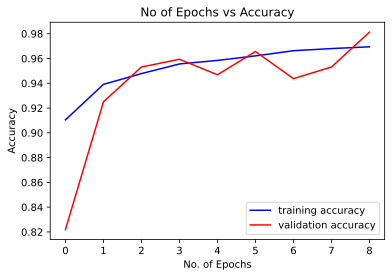

In [83]:
epoch_accuracy = history.history['accuracy']  ##getting  accuracy of each epochs
val_accuracy = history.history['val_accuracy']  ##getting validation accuracy of each epochs
epochs_=range(0,9)  
plt.plot(epochs_,epoch_accuracy,color='blue',label='training accuracy')
plt.plot(epochs_,val_accuracy,color='red',label='validation accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

plt.title("No of Epochs vs Accuracy")
plt.legend()

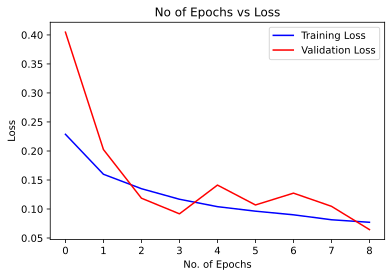

In [85]:
training_loss = history.history['loss']  ##getting  accuracy of each epochs
val_loss = history.history['val_loss']  ##getting validation accuracy of each epochs
epochs_=range(0,9)  
plt.plot(epochs_,training_loss,color='blue',label='Training Loss')
plt.plot(epochs_,val_loss,color='red',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

plt.title("No of Epochs vs Loss")
plt.legend()

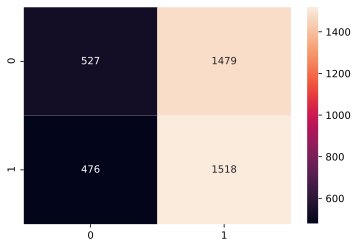

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(test_Y, result)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

## Hyper-Parameter Tuning:

We did a lot of manual tuning of parameters such as:

* Optimizer: like Adam and RMSprop
* Learning rate: (ranging from 0.1 to 0.0002)
* Activation functions:
* Layers in Model

We tried using Tensorboard for parameter tuning but the setup was very cumbersome and thus decided to stick with Manual tuning via trial and error. 

## Conclusion:
